In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.data' , header=None)
X = df.iloc[:,1:14].values
y = df.iloc[:,0].values
df.columns=['Classlabel', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinityofash', 'Magnesium', 
'Totalphenols', 'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins', 'Colorintensity', 'Hue', 'ofdilutedwines', 'Proline']

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=0 , stratify = y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [4]:
np.printoptions( precision= 4 )
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label] , axis=0))
    print( 'MV %s: %s\n' %(label , mean_vecs[label-1]))

MV 1: [ 0.9065826  -0.34973457  0.32010329 -0.71891449  0.50558678  0.88069702
  0.95894709 -0.55161049  0.54159322  0.23383109  0.58971299  0.65631399
  1.20749382]

MV 2: [-0.87487963 -0.28480003 -0.37347228  0.31571225 -0.38480347 -0.04332505
  0.06345321 -0.09460613  0.07034749 -0.82860474  0.31436962  0.36084258
 -0.72528643]

MV 3: [ 0.199215    0.8660339   0.168163    0.41484489 -0.04511771 -1.02855532
 -1.28756034  0.82867687 -0.77947565  0.96494432 -1.20899133 -1.36215159
 -0.40130076]



In [5]:
d=13 #questo è il numero di features
S_W = np.zeros((d,d))
for label , mv in zip(range(1,4) , mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row , mv = row.reshape(d,1) , mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W +=class_scatter
print('Matrice S_W: %sx%s' %(S_W.shape[0] , S_W.shape[1]))

Matrice S_W: 13x13


In [6]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [7]:
mean_overall = np.mean(X_train_std , axis = 0)
S_B = np.zeros((d,d))

for i , mean_vec in enumerate(mean_vecs):
    n=X_train[y_train == i+1 , :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += n* (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Matrice S_B: %sx%s' %(S_B.shape[0] , S_B.shape[1]))

Matrice S_B: 13x13


In [8]:
eigen_vals , eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#sorting eigenvalues...
eigen_pairs = [(np.abs(eigen_vals[i]) , eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs , key=lambda k : k[0] , reverse=True)
print('Autovalori in ordine discendente: \n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Autovalori in ordine discendente: 

8.262493673957481
4.225659486916682
7.190993296157536e-16
7.190993296157536e-16
6.000334073858813e-16
5.1187570513338645e-16
5.1187570513338645e-16
3.505556983142276e-16
1.6697077996802437e-16
1.6697077996802437e-16
1.4204403221246673e-16
1.0269898810321967e-17
0.0


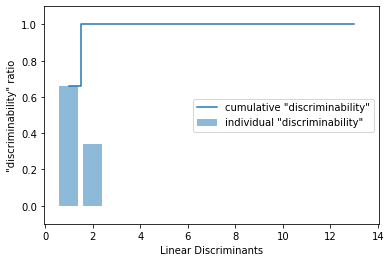

In [11]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real , reverse=True)]
discr = [(i / tot) for i in sorted(eigen_vals.real , reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
 label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
 label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')


In [12]:
#Creo la matrice di trasformazione prenendo i  discriminanti
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real , eigen_pairs[1][1][: , np.newaxis].real))
print('Matrice W: \n' , w)

Matrice W: 
 [[-0.15856101 -0.40770012]
 [ 0.0983994  -0.18214518]
 [-0.01555015 -0.34732562]
 [ 0.15877745  0.30951627]
 [-0.02070903 -0.06395442]
 [ 0.18843457  0.07330708]
 [-0.71526798  0.30343998]
 [-0.07975655 -0.00093295]
 [ 0.00742877  0.07163746]
 [ 0.34478986 -0.28077018]
 [-0.02540103  0.24395637]
 [-0.31916168 -0.04592015]
 [-0.40542991 -0.58055177]]


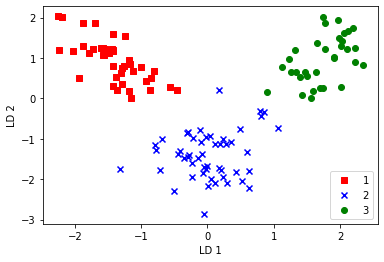

In [14]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l , 0],X_train_lda[y_train==l, 1] * (-1),c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()